#### 지도학습 - 회귀(Regression)

- 회귀? -> 변수간의 관계에 대해서 말하는 것으로 상관계수를 통해서 변수간 긴밀한 관계를 수치로 표현하며 한 변수의 변화가 다른 변수의 값을 파악 할 수 있게한다. 

- 종속변수(Y) - 연속된 숫자값으로 예측 , 독립변수(X) 
- 회귀분석에서는 독립변수가 종속변수에 어떤 영향을 미치는지를 알아보는 분석방법

- 선형회귀
- 다중회귀
- 다항회귀




- Linear Regression -> 해당 데이터를 가장 잘 대변해주는 선을 찾아내는 것

- 회귀 평가지표
- MSE (실제 값과 예측 값의 차이를 제곱 후 평균)
- RMSE (MSE의 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어서 루트를 씌운 것) 
- MAE
- MPE
- MAPE

- 손실 함수(loss function) 
- 가설함수의 성능을 평가하는 함수
- 손실 함수가 적으면 가설함수가 데이터에 잘 맞다

In [182]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits , load_boston

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression, LinearRegression

from   sklearn.svm             import SVC 

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score  
from   sklearn.metrics         import mean_squared_error , mean_absolute_error

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

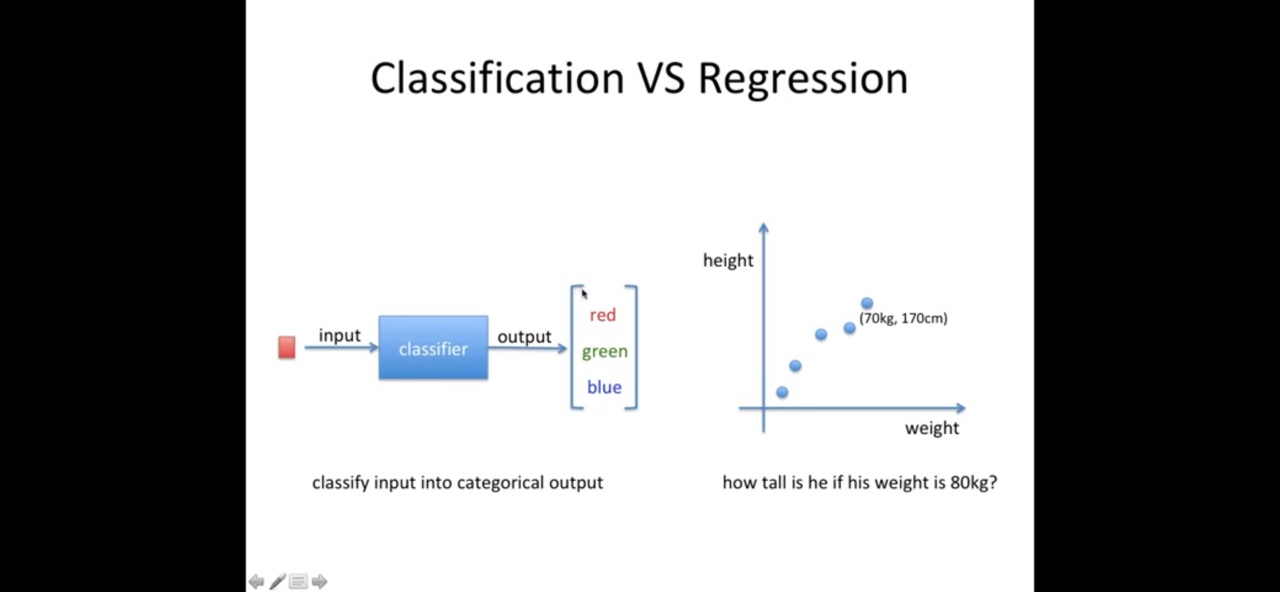

In [2]:
Image('c:/linear_img/linear01.png.jpg' , width = 700)

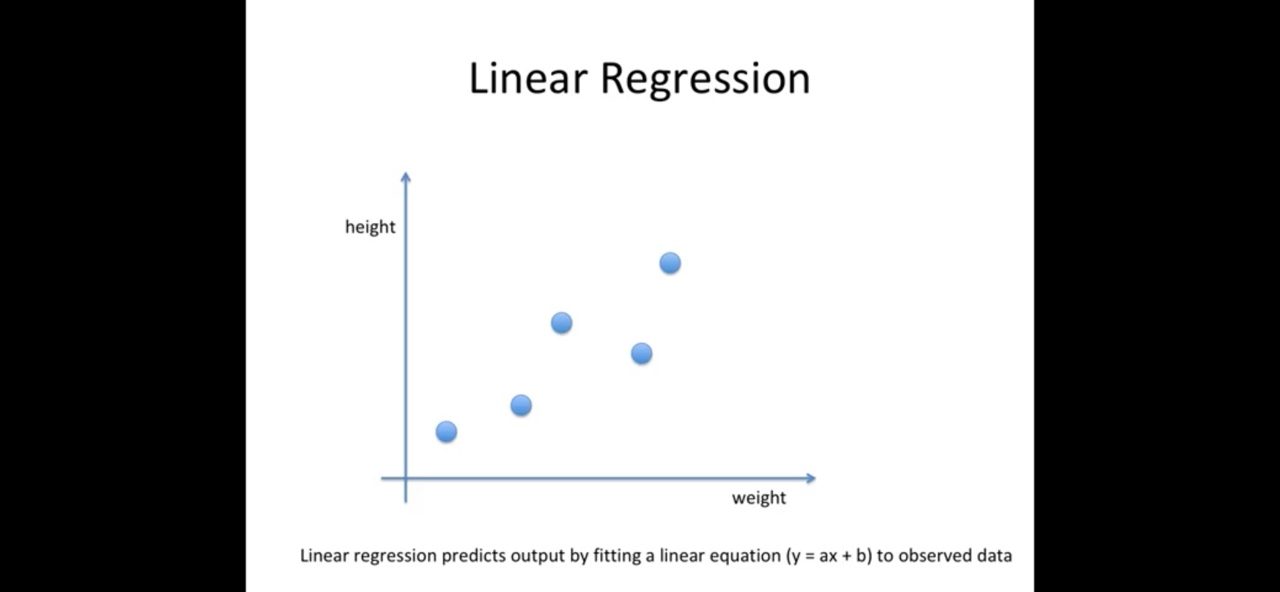

In [3]:
Image('c:/linear_img/linear02.png.jpg' , width = 700)

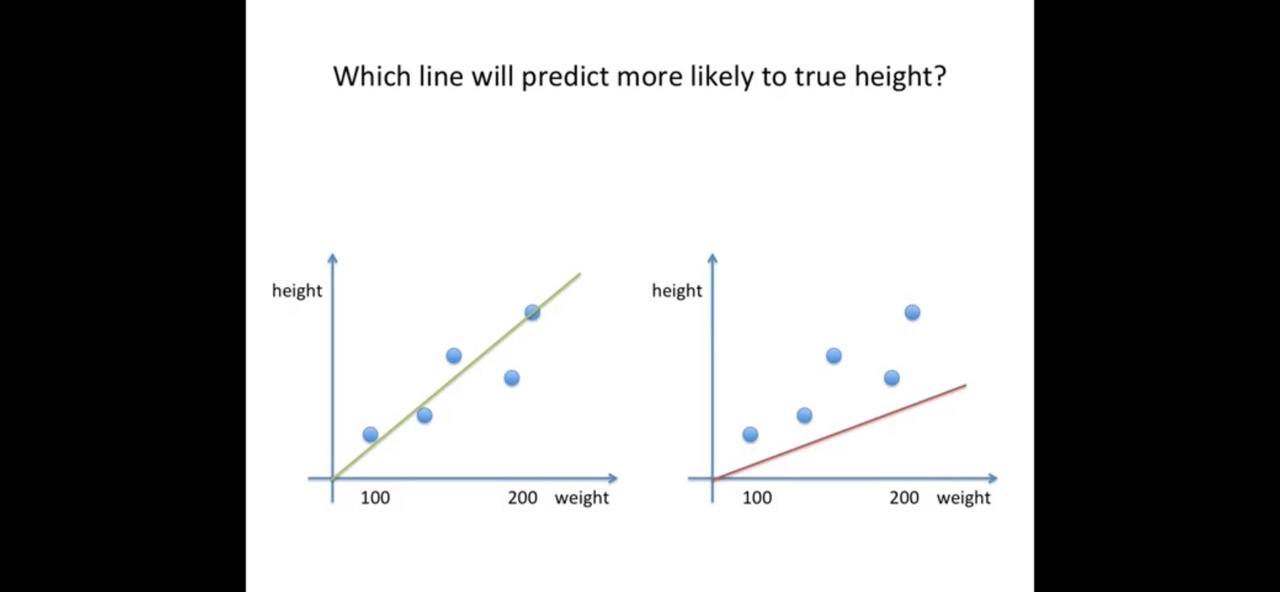

In [4]:
Image('c:/linear_img/linear03.png.jpg' , width = 700)

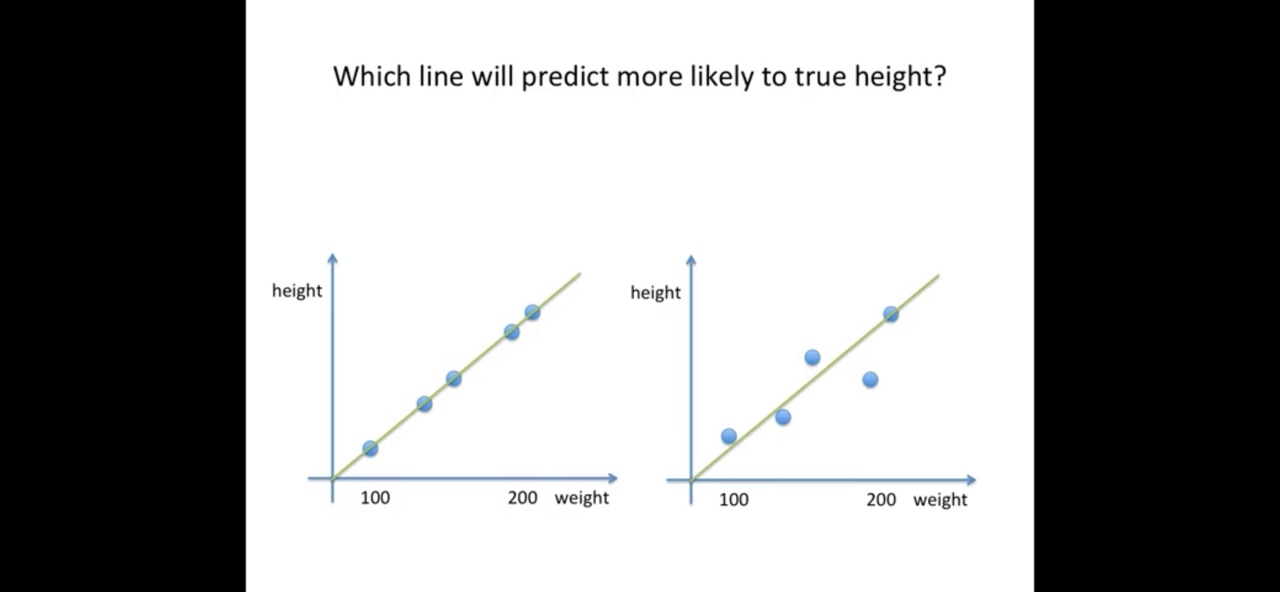

In [5]:
Image('c:/linear_img/linear04.png.jpg' , width = 700)

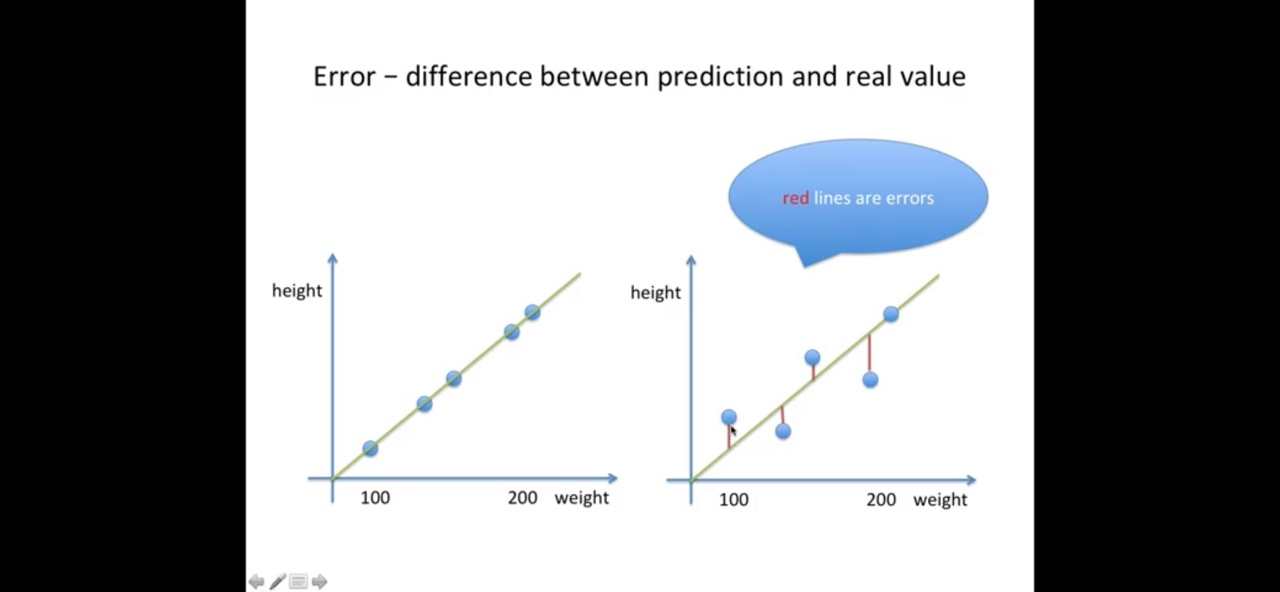

In [6]:
Image('c:/linear_img/linear05.png.jpg' , width = 700)

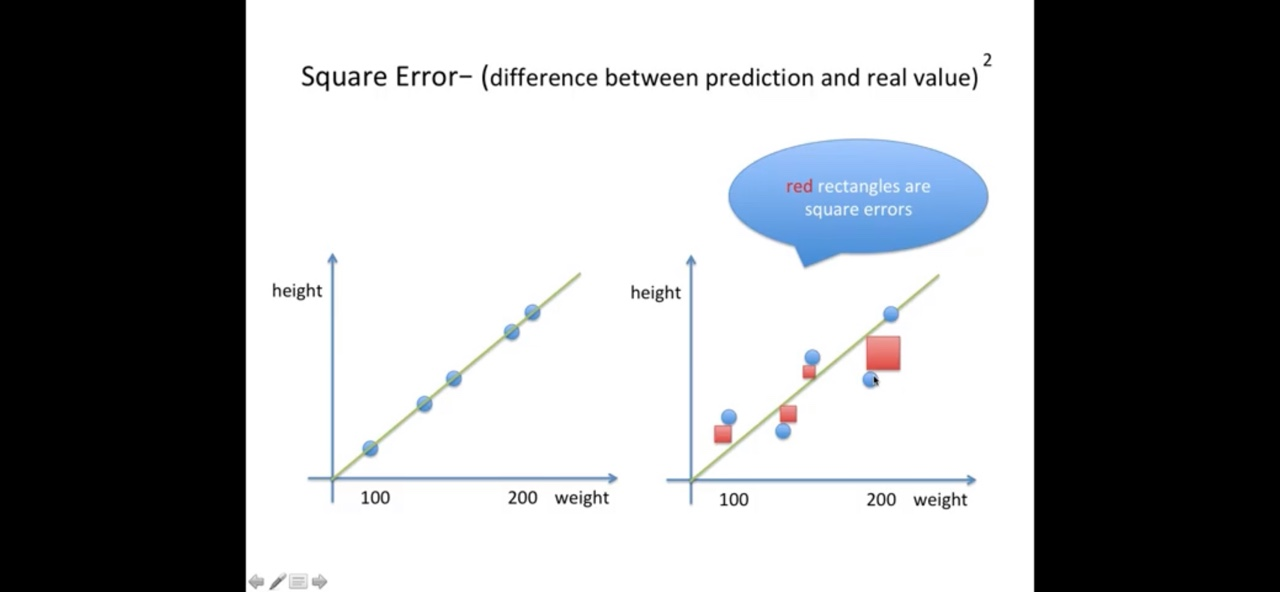

In [7]:
Image('c:/linear_img/linear06.png.jpg' , width = 700)

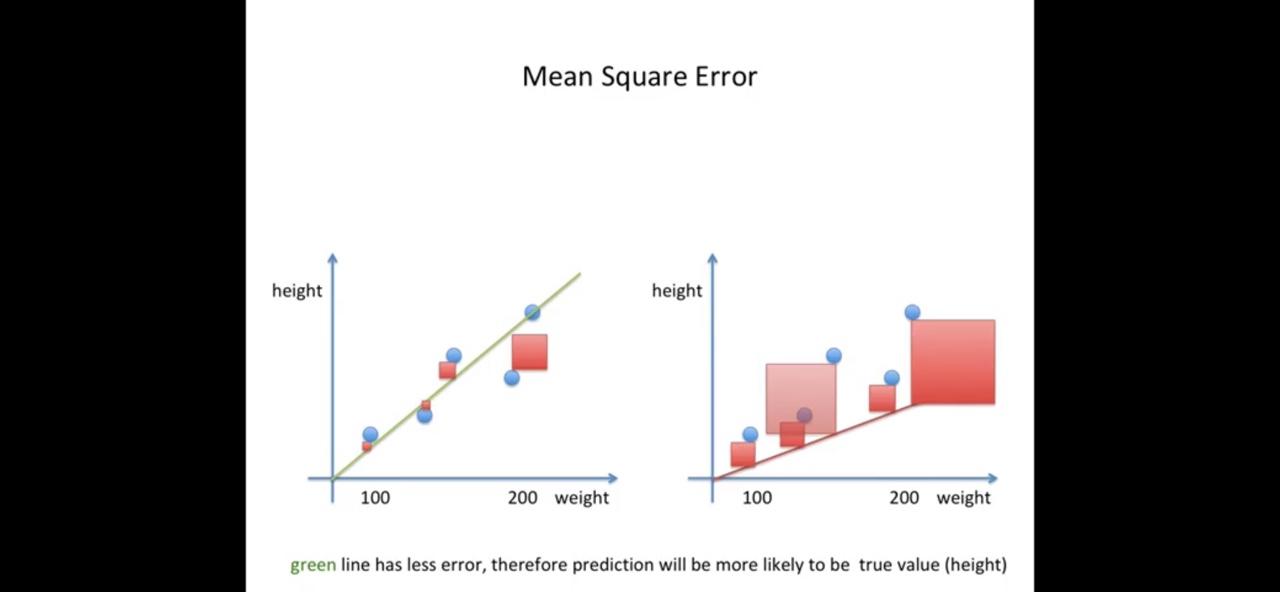

In [8]:
Image('c:/linear_img/linear07.png.jpg', width = 700)

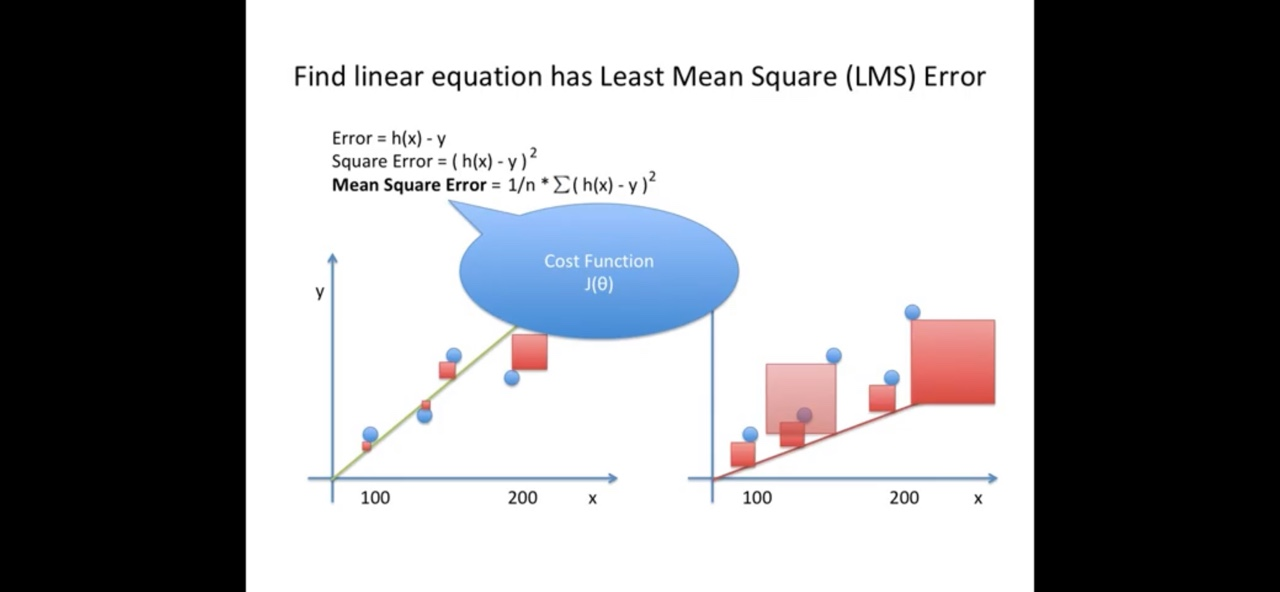

In [9]:
Image('c:/linear_img/linear09.png.jpg', width = 700)

f(x) = wx + b -> 예측함수를 통해서 예측값과 실제값의 차이를 계산

loss function -> cost(w,b) 엡데이트를 통해서 w, b 값을 조정 -> f(x) = wx + b


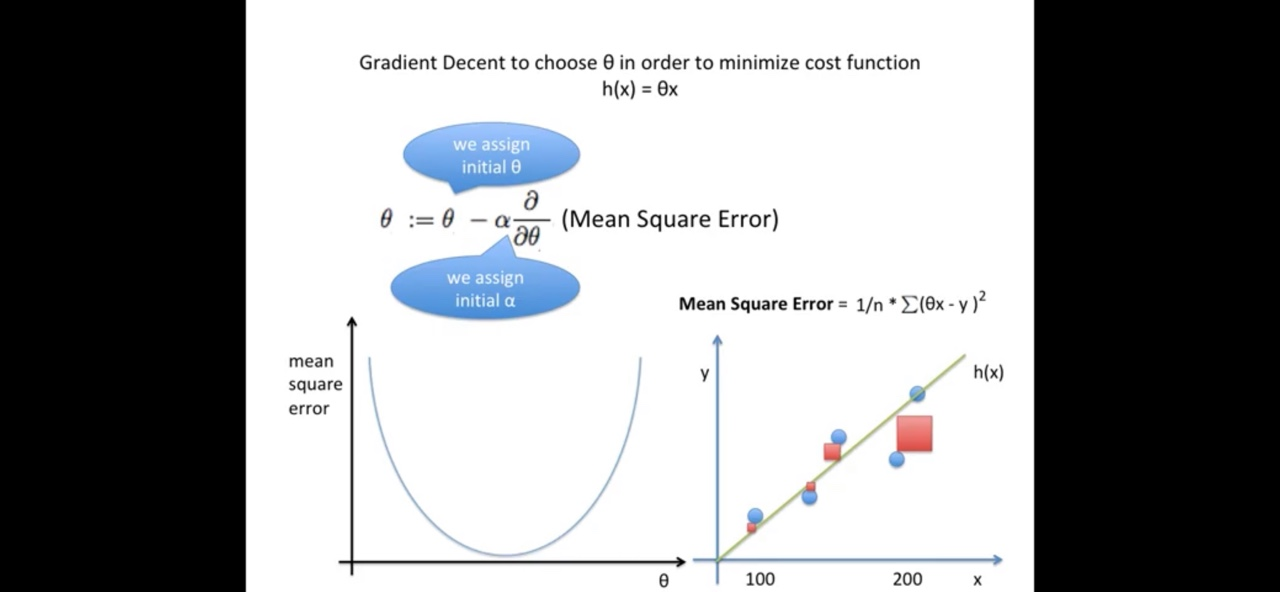

In [10]:
Image('c:/linear_img/linear10.png.jpg', width = 700)

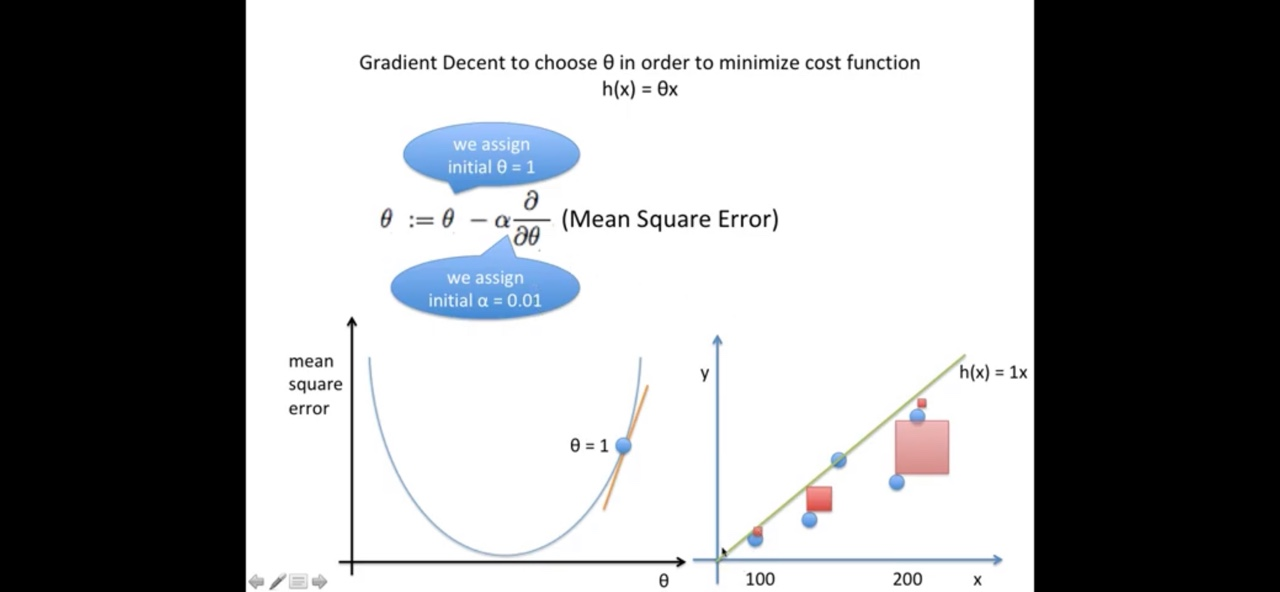

In [11]:
Image('c:/linear_img/linear11.png.jpg', width = 700)

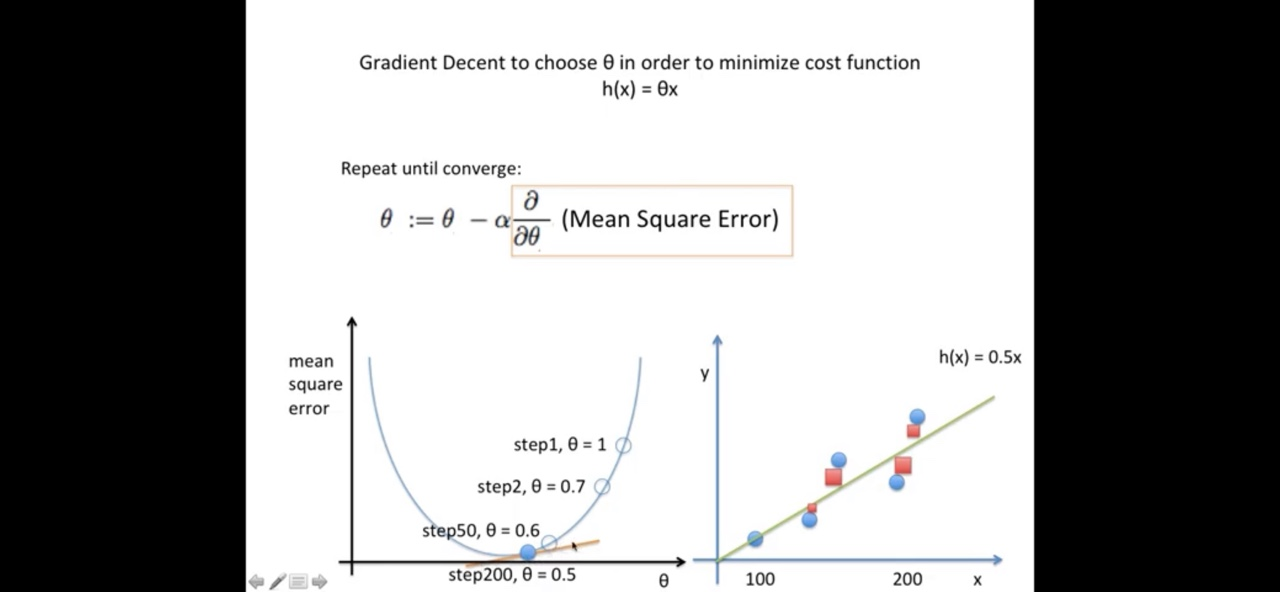

In [12]:
Image('c:/linear_img/linear15.png.jpg', width = 700)

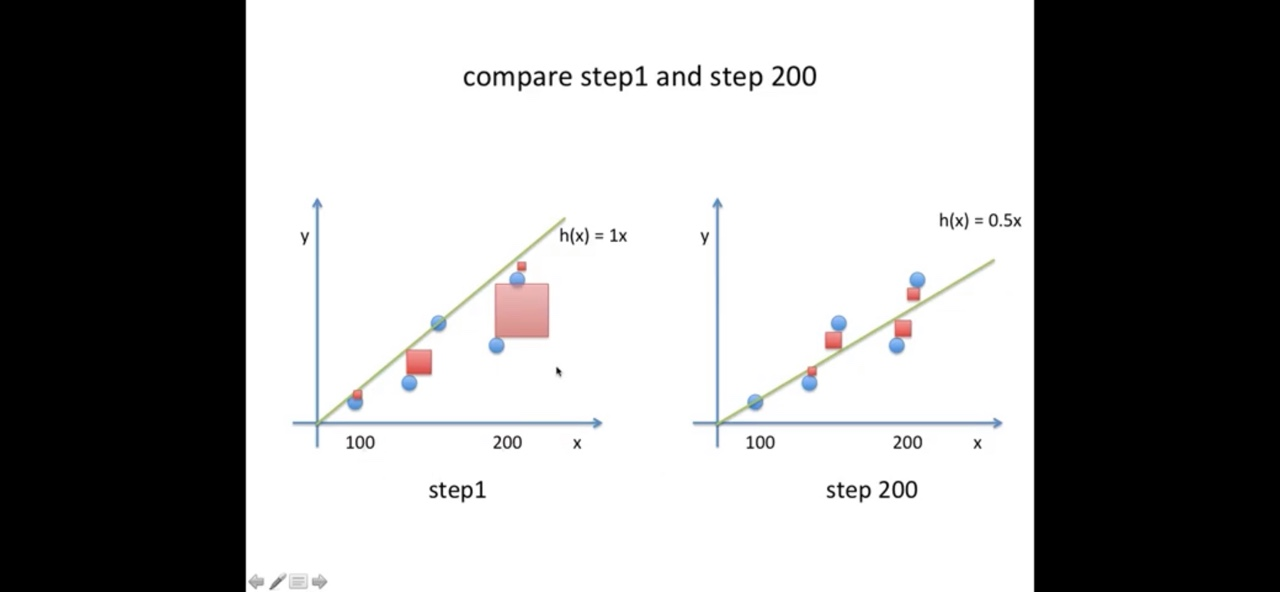

In [13]:
Image('c:/linear_img/linear16.png.jpg', width = 700)

In [129]:
print('단순 선형 회귀 - ') 
frm = pd.DataFrame({
   'height' : [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83] , 
   'mass'   : [ 50.21, 52.12, 54.48, 55.65, 58.34, 60.76, 62.45, 66.45, 67.45, 68.34, 70.34, 71.34, 73.23, 76.34]
    
})
frm

단순 선형 회귀 - 


,height,mass
0,1.47,50.21
1,1.50,52.12
2,1.52,54.48
3,1.55,55.65
4,1.57,58.34
5,1.60,60.76
6,1.65,62.45
7,1.68,66.45
8,1.70,67.45
9,1.73,68.34


In [130]:
print('독립변수 또는 설명변수 -> height')
print('종속변수               -> mass')
print('즉, height 변화에 따른 mass 값을 예측 - ') 

X = frm[['height']]
Y = frm[['mass']]

독립변수 또는 설명변수 -> height
종속변수               -> mass
즉, height 변화에 따른 mass 값을 예측 - 


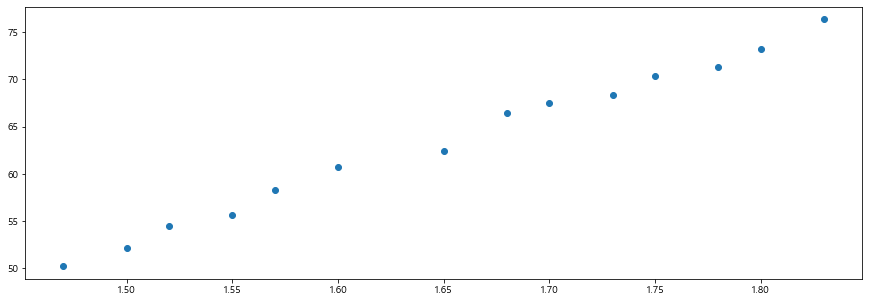

In [131]:
plt.figure( figsize = (15, 5))

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [132]:
linear_model = LinearRegression()
linear_model.fit(X , Y)
user_pred = linear_model.predict([[1.73]])
print('user pred - \n' , user_pred)
print()

y_pred = linear_model.predict(X)
print(y_pred)

user pred - 
 [[68.84303414]]

[[50.64244307]
 [52.74251127]
 [54.14255674]
 [56.24262494]
 [57.6426704 ]
 [59.7427386 ]
 [63.24285227]
 [65.34292047]
 [66.74296594]
 [68.84303414]
 [70.24307961]
 [72.34314781]
 [73.74319327]
 [75.84326147]]


In [133]:
print('w = 기울기 - ' , linear_model.coef_)
print()
print('b = 절편   - ' , linear_model.intercept_)


w = 기울기 -  [[70.00227335]]

b = 절편   -  [-52.26089876]


In [134]:
(70.00227335 * 1.78) + -52.26089876

72.343147803

In [135]:
print('R - squared (결정계수) ')
print()
print('R - ' , linear_model.score(X,Y))

R - squared (결정계수) 

R -  0.9925601477917719


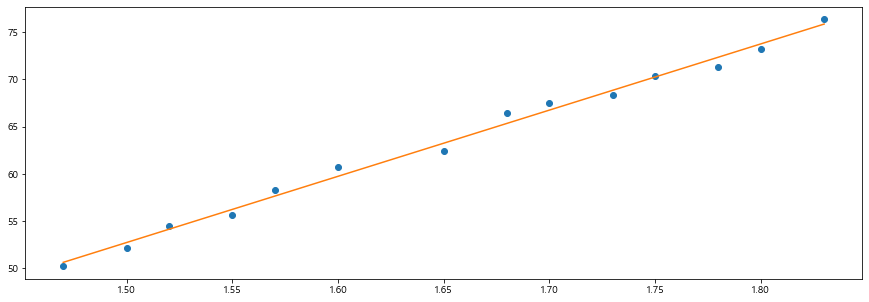

In [136]:
plt.figure( figsize = (15, 5))

plt.plot(X, Y, 'o')
plt.plot(X , linear_model.predict(X) )
plt.show()
plt.close()

- regression_toluca.csv

In [34]:
frm = pd.read_csv('./ml-data/regression_toluca.csv')
frm

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


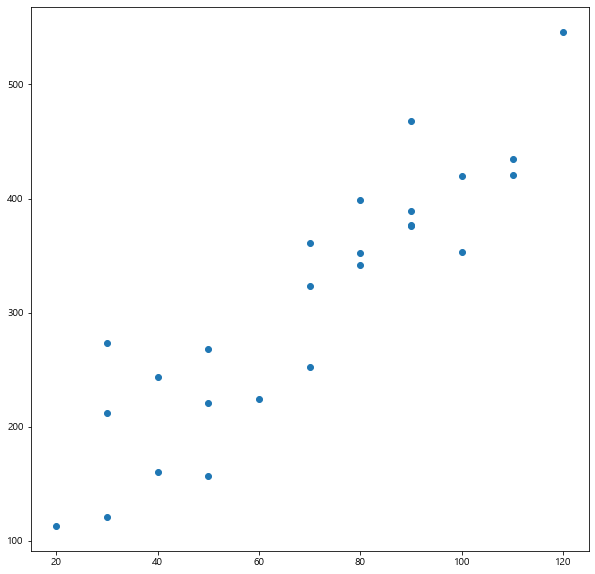

In [36]:
plt.figure( figsize = (10, 10))

plt.scatter(frm['Lot_size'] , frm['Work_hours'])

plt.show()
plt.close()

In [38]:
from statsmodels.formula.api import ols

fit = ols('Work_hours ~ Lot_size' , data = frm).fit()

In [39]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.45e-10
Time:                        10:38:24   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print('w = 기울기 - ' , fit.params.Lot_size)
print()
print('b = 절편   - ' , fit.params.Intercept)

w = 기울기 -  3.5702020202020206

b = 절편   -  62.36585858585867


In [45]:
print('학습에 사용된 독립변수에 대응하는 작업시간 추정치 - ')
print(fit.fittedvalues)

학습에 사용된 독립변수에 대응하는 작업시간 추정치 - 
0     347.982020
1     169.471919
2     240.875960
3     383.684040
4     312.280000
5     276.577980
6     490.790101
7     347.982020
8     419.386061
9     240.875960
10    205.173939
11    312.280000
12    383.684040
13    133.769899
14    455.088081
15    419.386061
16    169.471919
17    240.875960
18    383.684040
19    455.088081
20    169.471919
21    383.684040
22    205.173939
23    347.982020
24    312.280000
dtype: float64


In [53]:
print('sklearn 이용한 적합 - ')
print('독립변수는 2차원 어레이형식이여야 함 - ')

X = frm['Lot_size'].values.reshape(-1, 1)
# X = frm[['Lot_size']]
Y = frm['Work_hours']

linear_model = LinearRegression().fit(X, Y)


sklearn 이용한 적합 - 
독립변수는 2차원 어레이형식이여야 함 - 


In [54]:
print('w = 기울기 - ' , linear_model.coef_)
print()
print('b = 절편   - ' , linear_model.intercept_)

w = 기울기 -  [3.57020202]

b = 절편   -  62.365858585858575


In [55]:
linear_model.predict(X)

array([347.9820202 , 169.47191919, 240.8759596 , 383.6840404 ,
       312.28      , 276.5779798 , 490.79010101, 347.9820202 ,
       419.38606061, 240.8759596 , 205.17393939, 312.28      ,
       383.6840404 , 133.76989899, 455.08808081, 419.38606061,
       169.47191919, 240.8759596 , 383.6840404 , 455.08808081,
       169.47191919, 383.6840404 , 205.17393939, 347.9820202 ,
       312.28      ])

In [56]:
print('잔차 - ')
residual = Y - linear_model.predict(X)
print(residual)

잔차 - 
0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
Name: Work_hours, dtype: float64


In [57]:
linear_model.predict([[80]])

array([347.9820202])

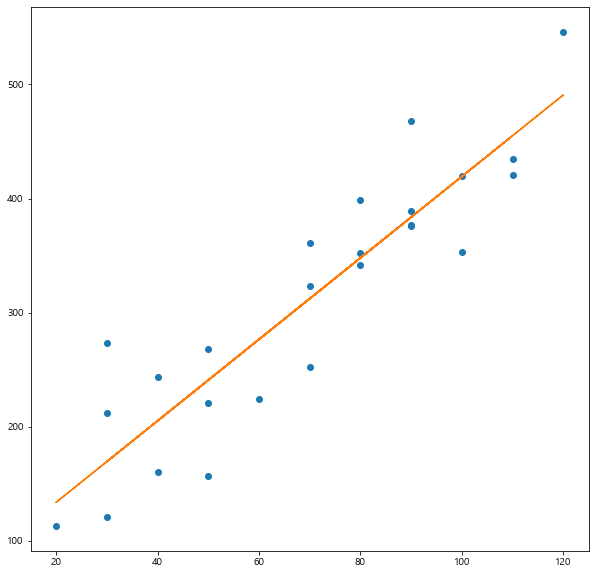

In [58]:
plt.figure( figsize = (10, 10))


plt.plot(X, Y, 'o')
plt.plot(X , linear_model.predict(X) )


plt.show()
plt.close()


- https://raw.githubusercontent.com/jmnote/z-dataset/master/simple-regression/iced-tea-orders.csv

In [60]:
tmp_frm = pd.read_csv('https://raw.githubusercontent.com/jmnote/z-dataset/master/simple-regression/iced-tea-orders.csv')
tmp_frm

,date,weekday,high_temperature,order
0,2002-07-22,Mon,29,77
1,2002-07-23,Tue,28,62
2,2002-07-24,Wed,34,93
3,2002-07-25,Thr,31,84
4,2002-07-26,Fri,25,59
5,2002-07-27,Sat,29,64
6,2002-07-28,Sun,32,80
7,2002-07-29,Mon,31,75
8,2002-07-30,Tue,24,58
9,2002-07-31,Wed,33,91


In [61]:
X = tmp_frm['high_temperature'].values.reshape(-1, 1)
# X = frm[['Lot_size']]
Y = tmp_frm['order']

linear_model = LinearRegression().fit(X, Y)

In [63]:
print('w = 기울기 - ' , linear_model.coef_)
print()
print('b = 절편   - ' , linear_model.intercept_)
print()
print('R squared  - ' , linear_model.score(X,Y))

w = 기울기 -  [3.73788546]

b = 절편   -  -36.361233480176196

R squared  -  0.8225092881166944


weight 학습결과를 시각화 - 


ValueError: Expected 2D array, got 1D array instead:
array=[130. 165. 150. 150. 140. 198. 220. 215. 225. 190. 170. 160. 150. 225.
  95.  95.  97.  85.  88.  46.  87.  90.  95. 113.  90. 215. 200. 210.
 193.  88.  90.  95. 100. 105. 100.  88. 100. 165. 175. 153. 150. 180.
 170. 175. 110.  72. 100.  88.  86.  90.  70.  76.  65.  69.  60.  70.
  95.  80.  54.  90.  86. 165. 175. 150. 153. 150. 208. 155. 160. 190.
  97. 150. 130. 140. 150. 112.  76.  87.  69.  86.  92.  97.  80.  88.
 175. 150. 145. 137. 150. 198. 150. 158. 150. 215. 225. 175. 105. 100.
 100.  88.  95.  46. 150. 167. 170. 180. 100.  88.  72.  94.  90.  85.
 107.  90. 145. 230.  49.  75.  91. 112. 150. 110. 122. 180.  95. 100.
 100.  67.  80.  65.  75. 100. 110. 105. 140. 150. 150. 140. 150.  83.
  67.  78.  52.  61.  75.  75.  75.  97.  93.  67.  95. 105.  72.  72.
 170. 145. 150. 148. 110. 105. 110.  95. 110. 110. 129.  75.  83. 100.
  78.  96.  71.  97.  97.  70.  90.  95.  88.  98. 115.  53.  86.  81.
  92.  79.  83. 140. 150. 120. 152. 100. 105.  81.  90.  52.  60.  70.
  53. 100.  78. 110.  95.  71.  70.  75.  72. 102. 150.  88. 108. 120.
 180. 145. 130. 150.  68.  80.  58.  96.  70. 145. 110. 145. 130. 110.
 105. 100.  98. 180. 170. 190. 149.  78.  88.  75.  89.  63.  83.  67.
  78.  97. 110. 110.  48.  66.  52.  70.  60. 110. 140. 139. 105.  95.
  85.  88. 100.  90. 105.  85. 110. 120. 145. 165. 139. 140.  68.  95.
  97.  75.  95. 105.  85.  97. 103. 125. 115. 133.  71.  68. 115.  85.
  88.  90. 110. 130. 129. 138. 135. 155. 142. 125. 150.  71.  65.  80.
  80.  77. 125.  71.  90.  70.  70.  65.  69.  90. 115. 115.  90.  76.
  60.  70.  65.  90.  88.  90.  90.  78.  90.  75.  92.  75.  65. 105.
  65.  48.  48.  67.  67.  67.  67.  62. 132. 100.  88.  72.  84.  84.
  92. 110.  84.  58.  64.  60.  67.  65.  62.  68.  63.  65.  65.  74.
  75.  75. 100.  74.  80.  76. 116. 120. 110. 105.  88.  85.  88.  88.
  88.  85.  84.  90.  92.  74.  68.  68.  63.  70.  88.  75.  70.  67.
  67.  67. 110.  85.  92. 112.  96.  84.  90.  86.  52.  84.  79.  82.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

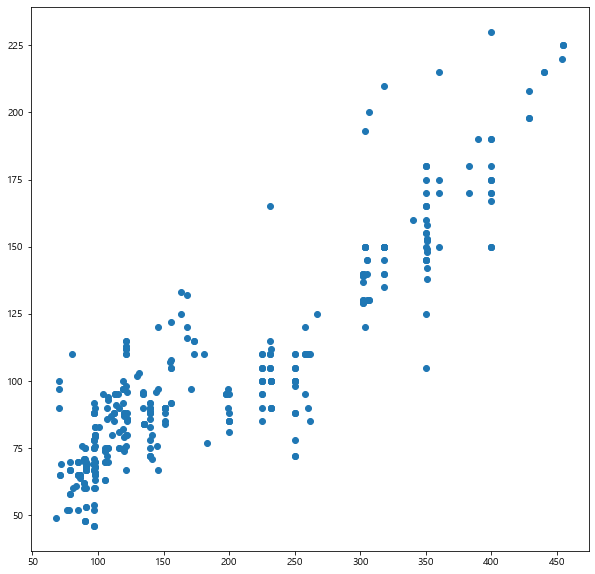

In [128]:
# (3.73788546 * 29) + -36.361233480176196
print('weight 학습결과를 시각화 - ') 

plt.figure( figsize = (10, 10))


plt.plot(X, Y, 'o')
plt.plot(X , linear_model.predict(Y) )


plt.show()
plt.close()


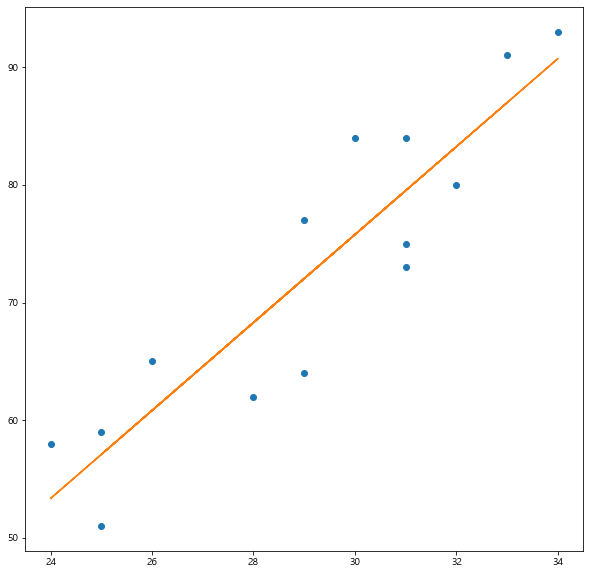

In [65]:
typ

- regression_auto-mpg.csv 선형회귀 [실습]

In [162]:
mpg_frm = pd.read_csv('./ml-data/regression_auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acc' , 'model year' , 'origin' , 'name']
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acc,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [163]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [164]:
print('horsepower를 예측하고 싶다면? - ') 
mpg_frm['horsepower'].unique()

horsepower를 예측하고 싶다면? - 


array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [165]:
mpg_frm['horsepower'].replace('?' , np.NaN , inplace = True) 
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [166]:
mpg_frm.dropna(subset = ['horsepower'] , axis = 0 , inplace = True) 
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [167]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acc           392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


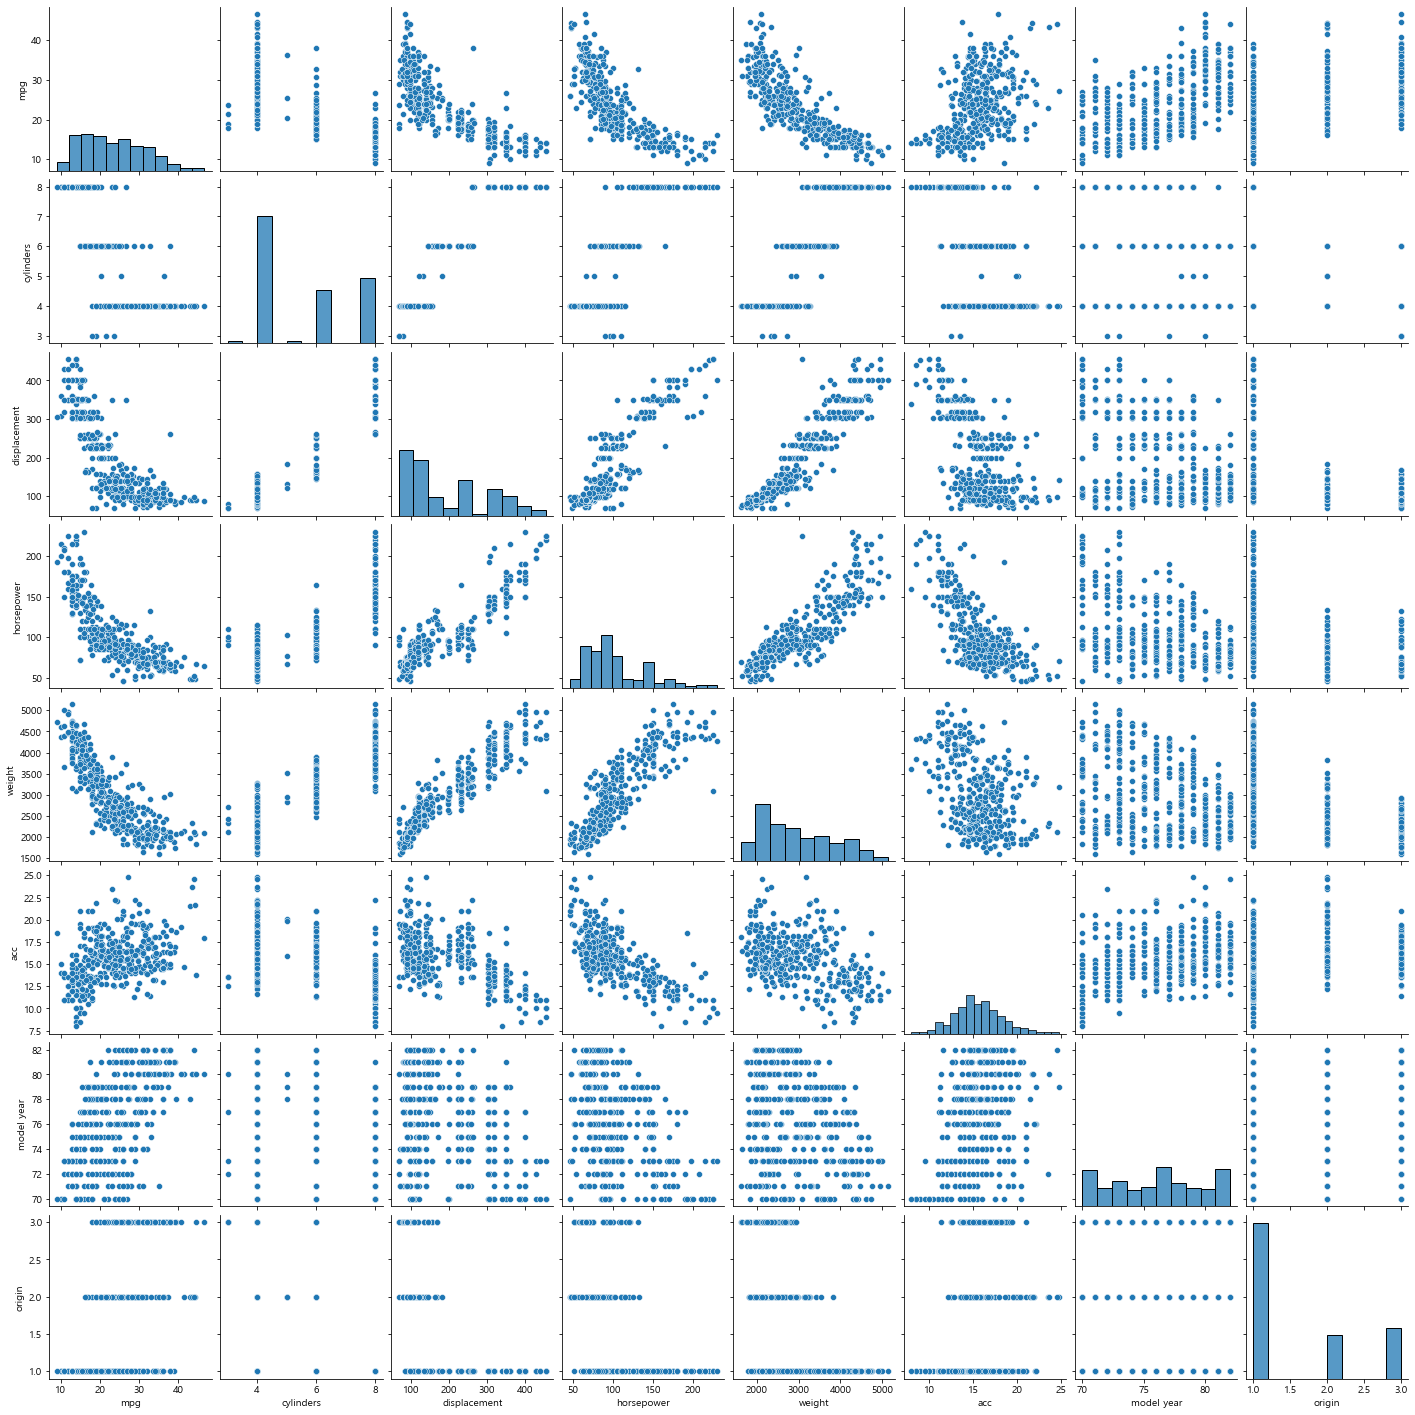

In [143]:
sns.pairplot(mpg_frm)

단순선형회귀 - horsepower - weight
선형관계를 파악하기 위해서 산점도 - 
horsepower - weight



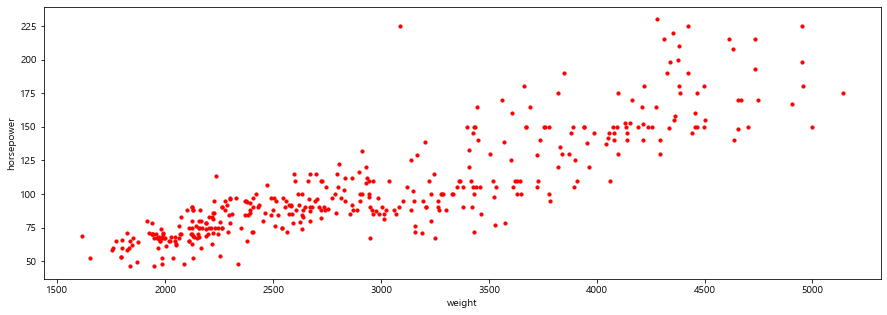

In [144]:
print('단순선형회귀 - horsepower - weight') 
print('선형관계를 파악하기 위해서 산점도 - ')
print('horsepower - weight')
print()

mpg_frm.plot(kind='scatter' , x = 'weight' , y='horsepower' , c='red' , s = 10 , figsize=(15,5))

plt.show()
plt.close()


선형관계를 파악하기 위해서 산점도 - 
horsepower - weight , horsepower - displacement 
subplot - 


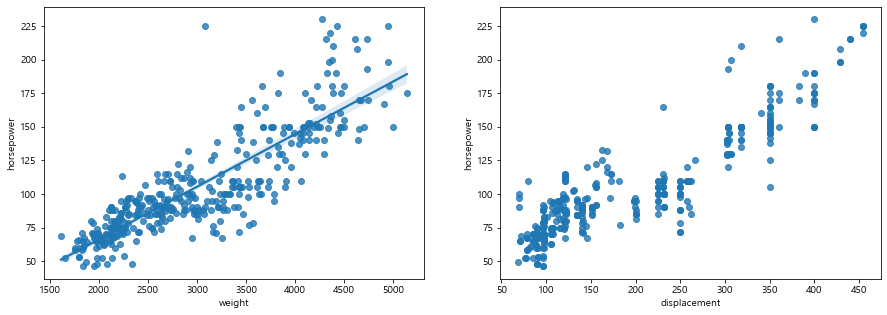

In [145]:
print('선형관계를 파악하기 위해서 산점도 - ')
print('horsepower - weight , horsepower - displacement ')
print('subplot - ')

fig = plt.figure( figsize = (15, 5))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

sns.regplot(data = mpg_frm , x = 'weight' , y = 'horsepower'  , ax = ax01)
sns.regplot(data = mpg_frm , x = 'displacement' , y = 'horsepower' , ax = ax02 , fit_reg = False)


plt.show()
plt.close()

In [146]:
print('학습을 위해서 독립변수 , 종속변수 분리 - ') 
print('독립변수 - 종속변수 ')
X = mpg_frm[['weight']]
Y = mpg_frm['horsepower'] 

학습을 위해서 독립변수 , 종속변수 분리 - 
독립변수 - 종속변수 


In [147]:
X_train , X_test_weight , y_train , y_test = train_test_split(X , 
                                                       Y , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test_weight.shape , y_train.shape , y_test.shape 

((313, 1), (79, 1), (313,), (79,))

In [148]:
mpg_weight_model = LinearRegression().fit(X_train , y_train) 
print('w = 기울기 - ' , mpg_weight_model.coef_)
print()
print('b = 절편   - ' , mpg_weight_model.intercept_)
print()
print('R squared  - ' , mpg_weight_model.score(X_test_weight , y_test))


w = 기울기 -  [0.04009385]

b = 절편   -  -13.98137655677823

R squared  -  0.6675924983624568


In [149]:
y_weight_pred = mpg_weight_model.predict(X_test_weight)

In [150]:
# print( type(y_pred))
# print( type(y_test))
mpg_weight_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_weight_pred
})
mpg_weight_actual_guess

,actual,guess
125,95.0,110.389758
142,67.0,64.722858
278,71.0,65.805392
254,85.0,104.896900
328,67.0,116.323648
...,...,...
235,75.0,76.831202
211,120.0,139.177145
189,120.0,144.870472
27,210.0,161.709891


In [168]:
print('학습을 위해서 독립변수 , 종속변수 분리 - ') 
print('독립변수 - 종속변수 ')
X = mpg_frm[['displacement']]
Y = mpg_frm['horsepower'] 

학습을 위해서 독립변수 , 종속변수 분리 - 
독립변수 - 종속변수 


In [169]:
X_train , X_test_displacement , y_train , y_test = train_test_split(X , 
                                                       Y , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test_displacement.shape , y_train.shape , y_test.shape 

((313, 1), (79, 1), (313,), (79,))

In [170]:
mpg_displacement_model = LinearRegression().fit(X_train , y_train) 
print('w = 기울기 - ' , mpg_displacement_model.coef_)
print()
print('b = 절편   - ' , mpg_displacement_model.intercept_)
print()
print('R squared  - ' , mpg_displacement_model.score(X_test_displacement , y_test))


w = 기울기 -  [0.33484262]

b = 절편   -  40.23160602226184

R squared  -  0.7562030535706883


In [171]:
y_displacement_pred = mpg_displacement_model.predict(X_test_displacement)

In [172]:
mpg_displacement_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_displacement_pred
})
mpg_displacement_actual_guess

,actual,guess
125,95.0,106.530444
142,67.0,66.684173
278,71.0,70.032599
254,85.0,107.200129
328,67.0,89.118628
...,...,...
235,75.0,72.711340
211,120.0,96.485166
189,120.0,142.023762
27,210.0,146.711558


weight 학습결과를 시각화 - 


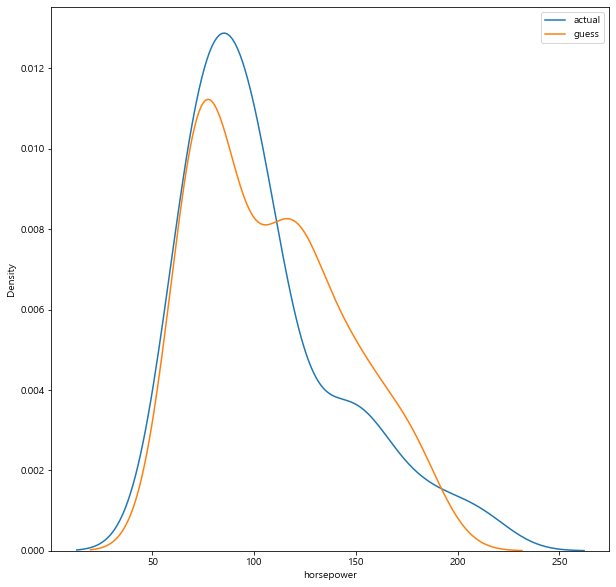

In [181]:
print('weight 학습결과를 시각화 - ') 

plt.figure( figsize = (10, 10))

sns.distplot(y_test , hist = False , label = 'actual')
sns.distplot(y_displacement_pred , hist = False , label = 'guess')

plt.legend()
plt.show()
plt.close()

- load_boston [실습]
- 다중 선형회귀

In [184]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [185]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [191]:
boston_frm = pd.DataFrame(data = boston.data , 
                          columns = boston.feature_names)
boston_frm['MEDV'] =  boston.target

boston_frm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [192]:
boston_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [196]:
X = pd.DataFrame(data = boston.data   , columns = boston.feature_names) 
Y = pd.DataFrame(data = boston.target , columns = ['MEDV'] ) 


In [198]:
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                        Y , 
                                                        test_size = 0.2 , 
                                                        random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((404, 13), (102, 13), (404, 1), (102, 1))

In [200]:
boston_model = LinearRegression().fit(X_train , y_train) 

print('w = 기울기 - ' , boston_model.coef_)
print()
print('b = 절편   - ' , boston_model.intercept_)
print()
print('R squared  - ' , boston_model.score(X_test , y_test))

w = 기울기 -  [[-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
  -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
   2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
  -4.85895548e-01]]

b = 절편   -  [36.33377029]

R squared  -  0.7555033086871304


In [202]:
y_pred = boston_model.predict(X_test) 


In [206]:
print('boston mse - ' , mean_squared_error(y_test , y_pred)  )

boston mse -  23.61699410056363


- https://github.com/Codecademy/datasets/blob/master/streeteasy/manhattan.csv

In [228]:
house_frm = pd.read_csv('./ml-data/manhattan.csv')
house_frm

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [230]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [231]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [244]:
house_X = house_frm[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator' , 'has_gym']]

house_Y = house_frm['rent'] 
# np.log1p(house_Y) 


상관분석을 위한 시각화 - 


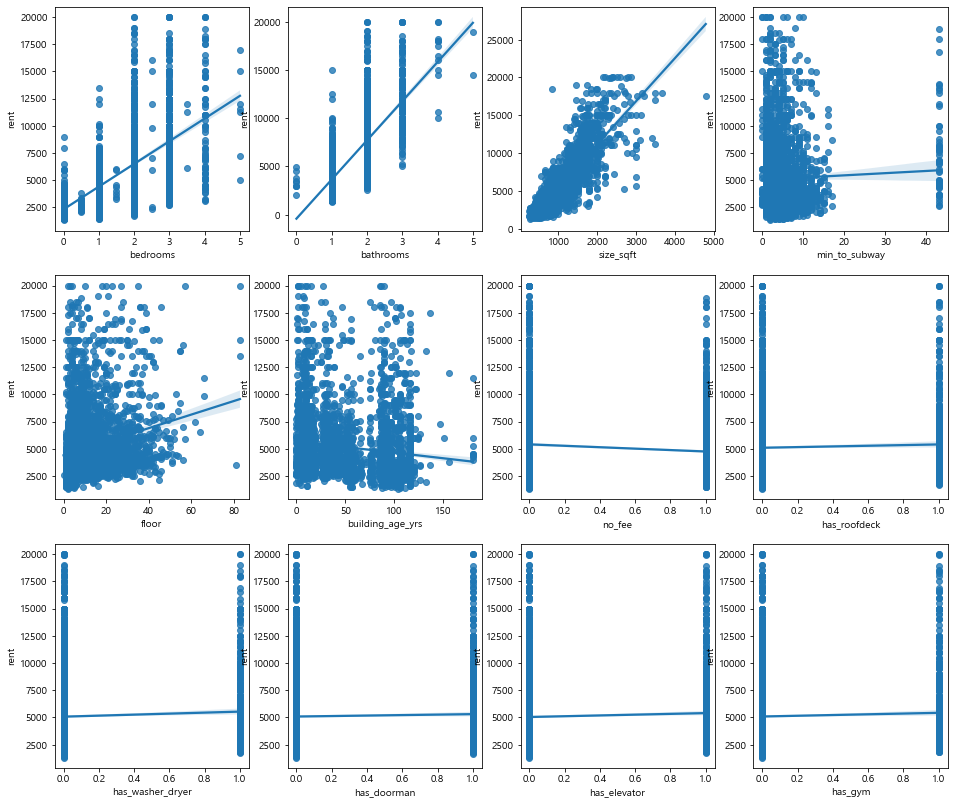

In [243]:
print('상관분석을 위한 시각화 - ') 

fig , axs = plt.subplots( figsize = (16, 14) , ncols = 4 , nrows = 3 ) 

for idx , feature in enumerate(house_X) :
    row  = int(idx/4) 
    col  = idx%4
    sns.regplot(x = feature , y = 'rent' , data = house_frm , ax = axs[row][col])

In [245]:
X_train , X_test , y_train , y_test = train_test_split( house_X, 
                                                        house_Y , 
                                                        test_size = 0.2 , 
                                                        random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((2831, 12), (708, 12), (2831,), (708,))

In [246]:
house_model = LinearRegression().fit(X_train , y_train) 

print('w = 기울기 - ' , house_model.coef_)
print()
print('b = 절편   - ' , house_model.intercept_)
print()
print('R squared  - ' , house_model.score(X_test , y_test))

w = 기울기 -  [-299.94705563 1194.9206811     4.8718184   -12.88574339   23.78956258
   -7.21431301 -115.19272767   19.39230874  146.99300893 -174.1635122
  125.09804407  -25.88538101]

b = 절편   -  -471.7022571029338

R squared  -  0.7579871005845259


In [247]:
my_request_apt = [[4, 2, 620, 5, 11, 10, 0, 0, 1, 0, 1, 1]]
user_pred =  house_model.predict(my_request_apt) 
user_pred

array([4110.19730228])

In [248]:
y_pred =  house_model.predict(X_test) 
y_pred

array([ 3750.63435883,  3355.5992188 ,  4314.85878488,  2059.83301856,
        3815.84664437,  2627.89486831, 13208.99684911,  2547.79086162,
        5945.60347297,  4149.69211242,  4256.07378091,  7625.99900714,
        6054.92612062,  2669.33570261, 11387.08338409,  5815.88305995,
        1726.05375459,  3342.06234721,  3504.280633  ,  2507.33419327,
        9518.48089149,  3516.57723527,  2011.98211842,  5058.80990216,
        8079.95302643,  4085.4877278 ,  3702.06480745,  3784.63108643,
        2325.30561227,  7467.97327101,  5043.79051515,  6884.6266052 ,
        3817.65785331,  7004.23036051,  6162.18274912,  8026.76980954,
        3946.01289632,  1880.68267532,  2931.59441108,  6389.37175214,
        8349.50146224,  3960.65871258,  2633.52399005,  5013.35708977,
        5762.50061205,  3728.28627142,  2435.127734  ,  8508.77692555,
        4885.84123601, 11636.24130179,  3776.86751382,  3557.58604666,
        3784.63108643,  3780.17621773,  4256.04746915,  6250.40108737,
      

- 회귀 평가지표

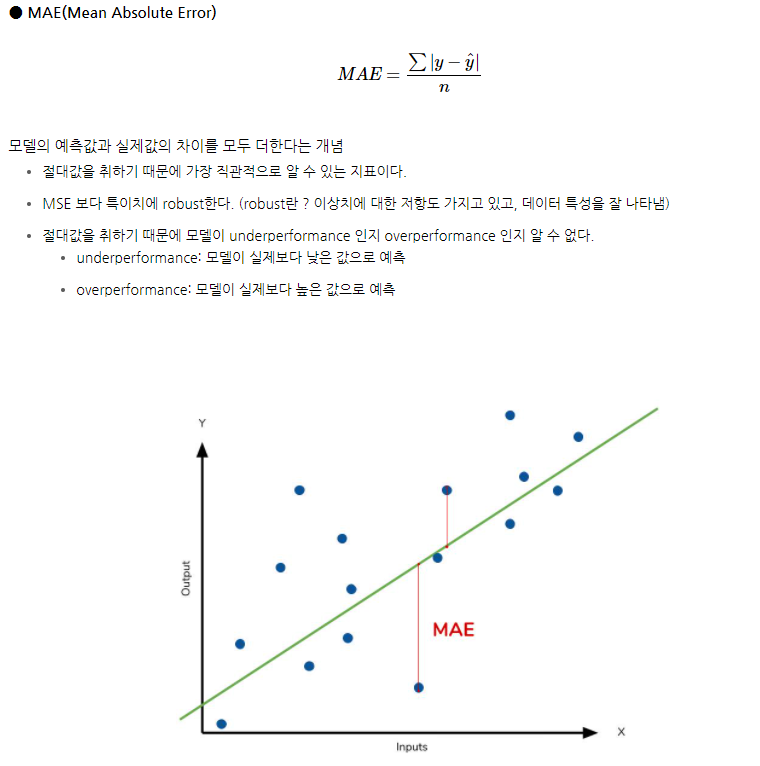

In [249]:
Image('c:/img/img/regression-eval-mae.png', width = 700)

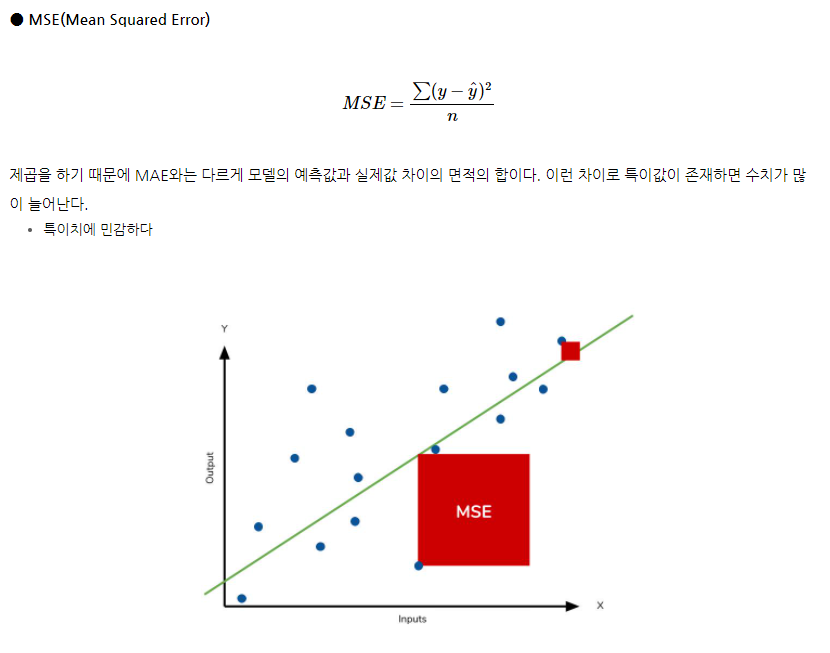

In [250]:
Image('c:/img/img/regression-eval-mse.png', width = 700)

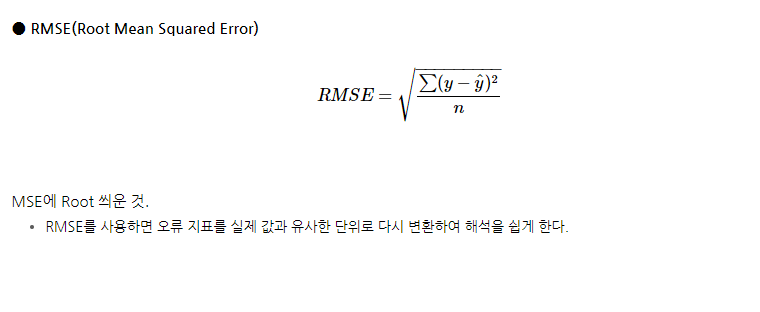

In [251]:
Image('c:/img/img/regression-eval-rmse.png', width = 700)

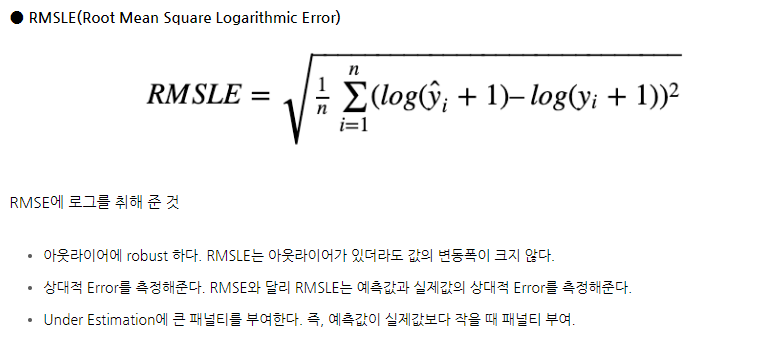

In [252]:
Image('c:/img/img/regression-eval-rmsle.png', width = 700)

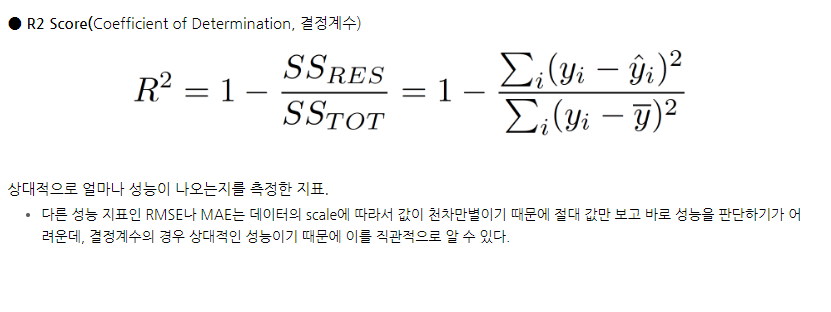

In [253]:
Image('c:/img/img/regression-eval-R2-Score.png', width = 700)

In [257]:
print('회귀 평가 지표 확인 - ') 
print('house mae  - ' , mean_absolute_error(y_test ,y_pred))
print('house mse  - ' , mean_squared_error(y_test ,y_pred))
print('house rmse - ' , np.sqrt( mean_squared_error(y_test ,y_pred)) ) 

회귀 평가 지표 확인 - 
house mae  -  956.6849295326573
house mse  -  2208644.6487324014
house rmse -  1486.150950856743


In [258]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [261]:
iris_frm = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_frm['target'] = iris.target
iris_frm.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:
iris_X = iris_frm.drop('sepal length (cm)' , axis= 1)
iris_Y = iris_frm['sepal length (cm)']

In [272]:
X_train , X_test , y_train , y_test = train_test_split( iris_X, 
                                                        iris_Y , 
                                                        test_size = 0.2 , 
                                                        random_state = 100)

iris_model = LinearRegression().fit(X_train , y_train) 
y_pred = iris_model.predict(X_test)

# print( type(y_pred)  , y_pred.shape)
# print( type(y_test)  , y_test.shape)
print('w = 기울기 - ' , iris_model.coef_)
print()
print('b = 절편   - ' , iris_model.intercept_)
print()
print('R squared  - ' , iris_model.score(X_test , y_test))

w = 기울기 -  [ 0.65775131  0.75988844 -0.52727914 -0.1725252 ]

b = 절편   -  1.745701547216017

R squared  -  0.8447723792713089


In [273]:


print('회귀 평가 지표 확인 - ') 
print('house mae  - ' , mean_absolute_error(y_test ,y_pred))
print('house mse  - ' , mean_squared_error(y_test ,y_pred))
print('house rmse - ' , np.sqrt( mean_squared_error(y_test ,y_pred)) ) 

회귀 평가 지표 확인 - 
house mae  -  0.2890424868777996
house mse  -  0.12227797110201427
house rmse -  0.3496826720070845


In [275]:
logY = np.log1p(iris_Y)
X_train , X_test , y_train , y_test = train_test_split( iris_X, 
                                                        logY , 
                                                        test_size = 0.2 , 
                                                        random_state = 100)

iris_model = LinearRegression().fit(X_train , y_train) 
y_pred = iris_model.predict(X_test)

# print( type(y_pred)  , y_pred.shape)
# print( type(y_test)  , y_test.shape)
print('w = 기울기 - ' , iris_model.coef_)
print()
print('b = 절편   - ' , iris_model.intercept_)
print()
print('R squared  - ' , iris_model.score(X_test , y_test))

w = 기울기 -  [ 0.0920203   0.10879783 -0.06649036 -0.02958404]

b = 절편   -  1.330194743961236

R squared  -  0.859618060564424


In [276]:


print('회귀 평가 지표 확인 - ') 
print('house mae  - ' , mean_absolute_error(y_test ,y_pred))
print('house mse  - ' , mean_squared_error(y_test ,y_pred))
print('house rmse - ' , np.sqrt( mean_squared_error(y_test ,y_pred)) ) 

회귀 평가 지표 확인 - 
house mae  -  0.03977866805458683
house mse  -  0.0022196391045392156
house rmse -  0.04711304601211023
